About the data set : 
The 7 classes of skin cancer lesions included in this dataset are:
Melanocytic nevi (nv)
Melanoma (mel)
Benign keratosis-like lesions (bkl)
Basal cell carcinoma (bcc) 
Actinic keratoses (akiec)
Vascular lesions (vas)
Dermatofibroma (df)

OM Gholap
9594931575

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import os
from glob import glob
from PIL import Image
import seaborn as sns

np.random.seed(42)

from sklearn.metrics import confusion_matrix

import keras 
from keras.utils import to_categorical 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.preprocessing import LabelEncoder

In [3]:
skin_df = pd.read_csv("archive/HAM10000_metadata.csv")


In [4]:
SIZE = 32

In [62]:
skin_df['dx'].value_counts()

nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64

In [9]:
le = LabelEncoder()
le.fit(skin_df['dx'])
LabelEncoder()

print(list(le.classes_))

['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']


In [17]:
skin_df['label'] = le.transform(skin_df['dx'])

skin_df.tail(10)

skin_df['label'].value_counts()

5    6705
4    1113
2    1099
1     514
0     327
6     142
3     115
Name: label, dtype: int64

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


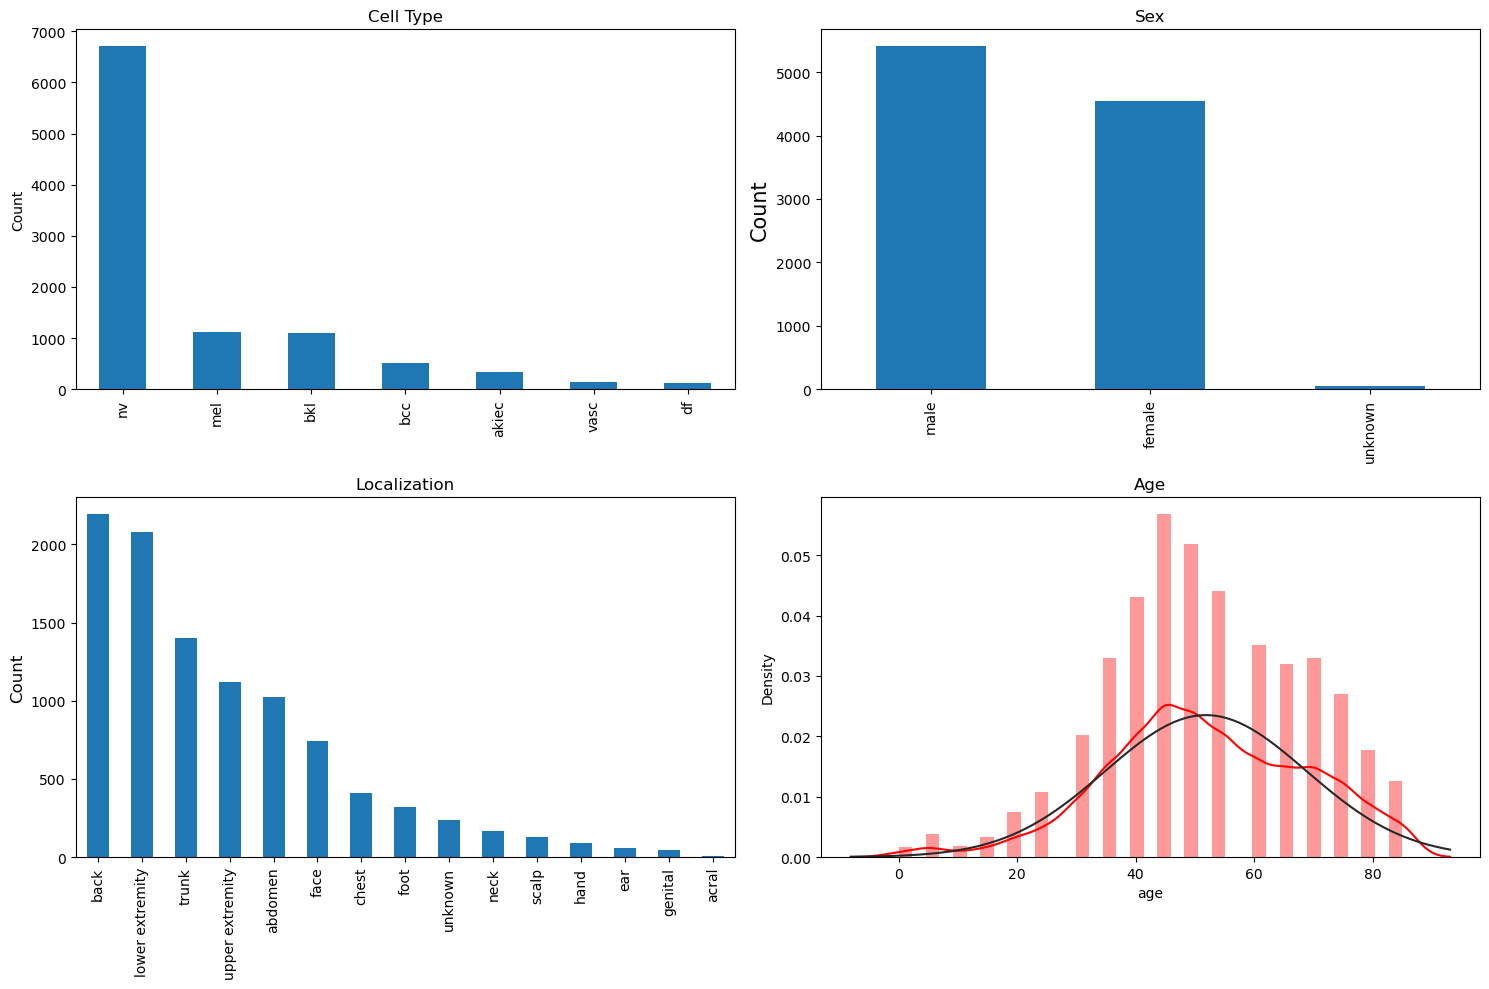

In [16]:
# Data distribution visualization
fig = plt.figure(figsize=(15,10))

ax1 = fig.add_subplot(221)
skin_df['dx'].value_counts().plot(kind='bar', ax=ax1)
ax1.set_ylabel('Count')
ax1.set_title('Cell Type')

ax2 = fig.add_subplot(222)
skin_df['sex'].value_counts().plot(kind='bar', ax=ax2)
ax2.set_ylabel('Count', size=15)
ax2.set_title('Sex')

ax3 = fig.add_subplot(223)
skin_df['localization'].value_counts().plot(kind='bar')
ax3.set_ylabel('Count',size=12)
ax3.set_title('Localization')


ax4 = fig.add_subplot(224)
sample_age = skin_df[pd.notnull(skin_df['age'])]
sns.distplot(sample_age['age'], fit=stats.norm, color='red')
ax4.set_title('Age')

plt.tight_layout()
plt.show()

What the above diagram tells us : 
This data is imbalanced for the dx / cell type values as we can see in the next code line also, 

nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64

we have a lot how value count for the nv cell type, while the rest of the data is very less. This may give good accuracy 
but in terms of nv and not for other cell types. So data balancing needs to be done.


Balancing the data to 500 samples to each feature : 
why 500, because more the data balance is done by dupplication and images and bringing all the counts of data to 500. 

In [21]:
from sklearn.utils import resample

print(skin_df['label'].value_counts())

5    6705
4    1113
2    1099
1     514
0     327
6     142
3     115
Name: label, dtype: int64


In [22]:
#Balance data.
#Separate each classes, resample, and combine back into single dataframe

df_0 = skin_df[skin_df['label'] == 0]
df_1 = skin_df[skin_df['label'] == 1]
df_2 = skin_df[skin_df['label'] == 2]
df_3 = skin_df[skin_df['label'] == 3]
df_4 = skin_df[skin_df['label'] == 4]
df_5 = skin_df[skin_df['label'] == 5]
df_6 = skin_df[skin_df['label'] == 6]

In [23]:
n_samples=500 
df_0_balanced = resample(df_0, replace=True, n_samples=n_samples, random_state=42) 
df_1_balanced = resample(df_1, replace=True, n_samples=n_samples, random_state=42) 
df_2_balanced = resample(df_2, replace=True, n_samples=n_samples, random_state=42)
df_3_balanced = resample(df_3, replace=True, n_samples=n_samples, random_state=42)
df_4_balanced = resample(df_4, replace=True, n_samples=n_samples, random_state=42)
df_5_balanced = resample(df_5, replace=True, n_samples=n_samples, random_state=42)
df_6_balanced = resample(df_6, replace=True, n_samples=n_samples, random_state=42)

In [25]:
len(df_1_balanced)

500

In [27]:
df_1_balanced.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,label
2564,HAM_0001907,ISIC_0025513,bcc,histo,40.0,male,back,1
2897,HAM_0006904,ISIC_0027281,bcc,histo,70.0,male,back,1
2732,HAM_0004027,ISIC_0024595,bcc,histo,65.0,female,back,1
2568,HAM_0006384,ISIC_0031272,bcc,histo,80.0,male,face,1
2533,HAM_0005921,ISIC_0030800,bcc,histo,75.0,male,lower extremity,1


In [29]:
skin_df_balanced = pd.concat([df_0_balanced, df_1_balanced, df_2_balanced,df_3_balanced, df_4_balanced, df_5_balanced,df_6_balanced])

In [34]:
skin_df_balanced['label'].value_counts()

print(skin_df_balanced.tail(10
            ))

        lesion_id      image_id    dx    dx_type   age     sex  \
2424  HAM_0002177  ISIC_0025612  vasc  consensus  45.0  female   
2320  HAM_0006889  ISIC_0031197  vasc      histo  20.0    male   
2450  HAM_0007568  ISIC_0024867  vasc  consensus  75.0    male   
2411  HAM_0007372  ISIC_0030283  vasc  consensus  55.0    male   
2432  HAM_0007118  ISIC_0027856  vasc  consensus  45.0  female   
2375  HAM_0005989  ISIC_0033123  vasc      histo  25.0  female   
2436  HAM_0004943  ISIC_0027790  vasc  consensus  50.0  female   
2453  HAM_0001038  ISIC_0024706  vasc  consensus  50.0    male   
2377  HAM_0007097  ISIC_0033762  vasc      histo  60.0    male   
2363  HAM_0003862  ISIC_0033031  vasc      histo  45.0    male   

         localization  label  
2424             neck      6  
2320  upper extremity      6  
2450            trunk      6  
2411            trunk      6  
2432            trunk      6  
2375             back      6  
2436             face      6  
2453            trunk    

In [35]:
# reading the data from the folders and adding to the dataframe


image_path = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join('archive/', '*','*.jpg'))}
#Define the path and add as a new column
skin_df_balanced['path'] = skin_df['image_id'].map(image_path.get)
#Use the path to read images.
skin_df_balanced['image'] = skin_df_balanced['path'].map(lambda x: np.asarray(Image.open(x).resize((SIZE,SIZE))))


In [42]:
for col in skin_df_balanced.columns:
    print(col)

lesion_id
image_id
dx
dx_type
age
sex
localization
label
path
image


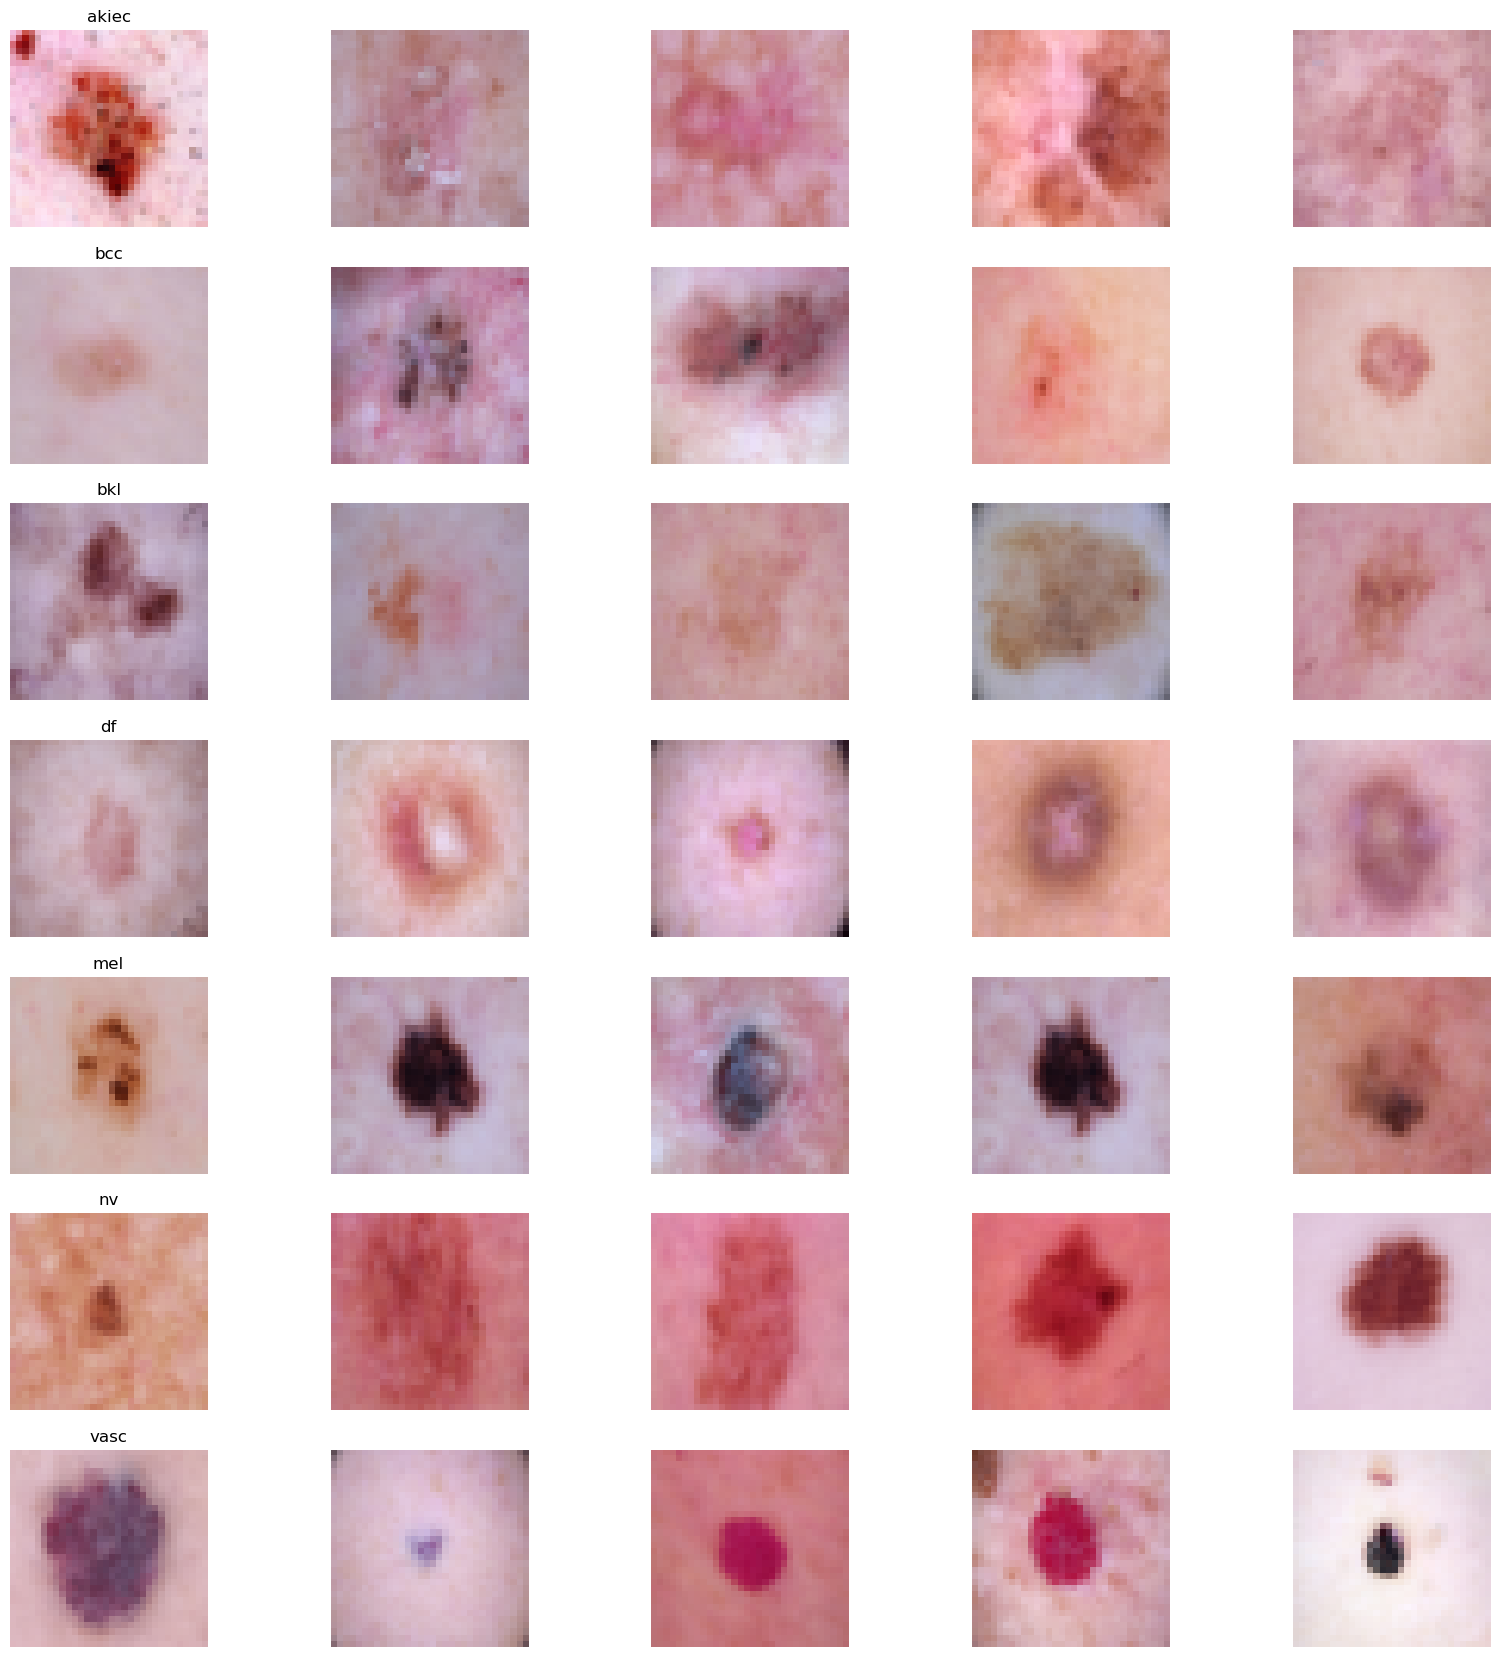

In [43]:
n_samples = 5  

# Plot
fig, m_axs = plt.subplots(7, n_samples, figsize = (4*n_samples, 3*7))
for n_axs, (type_name, type_rows) in zip(m_axs, 
                                         skin_df_balanced.sort_values(['dx']).groupby('dx')):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=1234).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')

In [44]:
#Convert dataframe column of images into numpy array
X = np.asarray(skin_df_balanced['image'].tolist())
X = X/255.  # Scale values to 0-1. 
Y=skin_df_balanced['label']  #Assign label values to Y
Y_cat = to_categorical(Y, num_classes=7) #Convert to categorical as this is a multiclass classification problem
#Split to training and testing
x_train, x_test, y_train, y_test = train_test_split(X, Y_cat, test_size=0.25, random_state=42)

In [46]:
Y_cat

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [47]:
num_classes = 7

model = Sequential()
model.add(Conv2D(256, (3, 3), activation="relu", input_shape=(SIZE, SIZE, 3)))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))  
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3),activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))  
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3),activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))  
model.add(Dropout(0.3))
model.add(Flatten())

model.add(Dense(32))
model.add(Dense(7, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['acc'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 256)       7168      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 256)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 256)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 128)       295040    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 128)        0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 128)         0

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 256)       7168      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 256)      0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 15, 15, 256)       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 128)       295040    
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 6, 6, 128)        0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 6, 6, 128)        

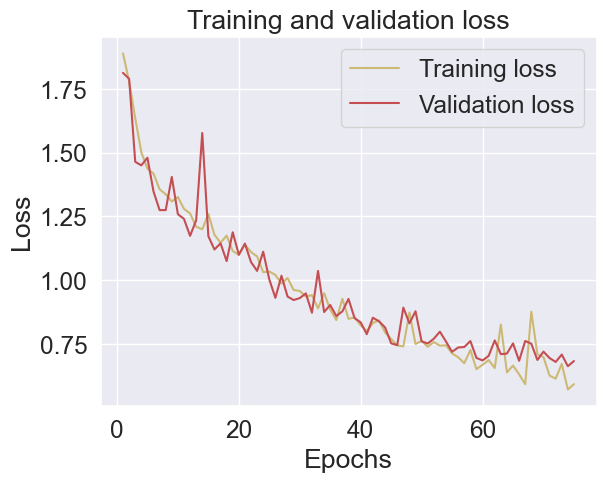

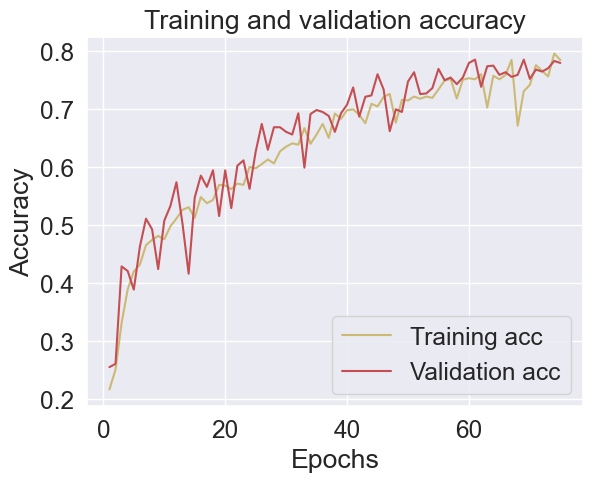

In [58]:
# icreasing the accuracy  setting the epochs to 75 and batch size to 32

# #Convert dataframe column of images into numpy array
# X = np.asarray(skin_df_balanced['image'].tolist())
# X = X/255.  # Scale values to 0-1. You can also used standardscaler or other scaling methods.
# Y=skin_df_balanced['label']  #Assign label values to Y
# Y_cat = to_categorical(Y, num_classes=7) #Convert to categorical as this is a multiclass classification problem
# #Split to training and testing
x_train, x_test, y_train, y_test = train_test_split(X, Y_cat, test_size=0.25, random_state=50)


num_classes = 7

model = Sequential()
model.add(Conv2D(256, (3, 3), activation="relu", input_shape=(SIZE, SIZE, 3)))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))  
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3),activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))  
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3),activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))  
model.add(Dropout(0.3))
model.add(Flatten())

model.add(Dense(32))
model.add(Dense(7, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['acc'])
 # increasig the number of epochs 


batch_size = 32
epochs = 75

history = model.fit(
    x_train, y_train,
    epochs=epochs,
    batch_size = batch_size,
    validation_data=(x_test, y_test),
    verbose=2)


#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

the above graph of validation accuracy tells us that the accuracy of the current model is peaking out at 0.77 or 77%. So even if we try to increase the epochs the model might overfit on the data.

What we can try to improve the model : 
changing the layers of the model, the optimiser, and activation functions. etc. 
try using tensorflow data augmentation method instead resample method of sklearn

how the model layer was selected : 
the model configuration was selected using auto keras that suggested we use this architecture of the model, which would result in the best accuracy out of all the combination the autokeras has tried.

28/28 [==============================] - 4s 102ms/step
[[108  10   3   5   1   0   0]
 [ 23  87   3  11   2   1   2]
 [ 19   7  79   3  14   0   0]
 [  3   3   0 119   0   0   0]
 [ 11   4  16   0  81   7   0]
 [  5   4  17   5  22  63   1]
 [  0   0   0   0   0   0 136]]


Text(33.25, 0.5, 'Fraction of incorrect predictions')

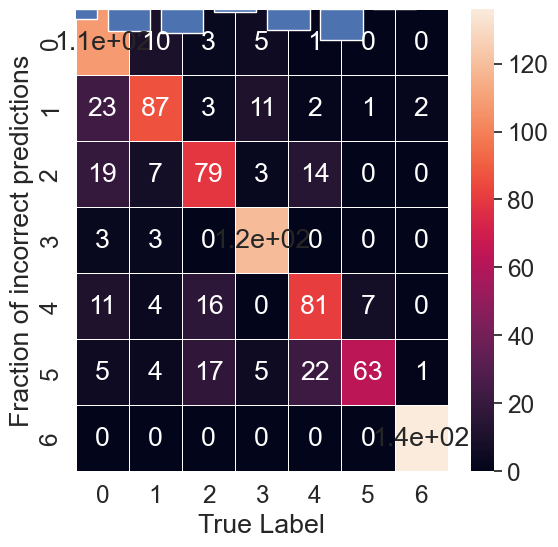

In [60]:
y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(y_pred, axis = 1) 
# Convert test data to one hot vectors
y_true = np.argmax(y_test, axis = 1) 

#Print confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
print(cm)

fig, ax = plt.subplots(figsize=(6,6))
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)
	#PLot fractional incorrect misclassifications
incorr_fraction = 1 - np.diag(cm) / np.sum(cm, axis=1)
plt.bar(np.arange(7), incorr_fraction)
plt.xlabel('True Label')
plt.ylabel('Fraction of incorrect predictions')
